# Visualize Weather

These are visualization of the weather data I gathered from the NOAA site, located in New York's Central Park. They show weather conditions across about just over 4 years, 1599 weeks, or 11193 days.

These were interesting, but I didn't use them in my models. They just showed that the only thing that really mattered was the temperature.


Sampling is important because we have too much data to work with effectively. So for weather data 1599 samples is a good number. While I could drill down to weather per hour, it's almost too much to work with.

After visualizing, especially the weather histograms, I was able to get a better idea of how to label the weather events. So I did that and then oneshot encoded them for further analysis later on, creating a broader categories for temperature and another for conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(16,16)


In [2]:
df_daily = pd.read_csv("csvs/daily_weather_nyc.csv", index_col=0)

In [3]:
df_daily.head()

,DATE,Sunrise,Sunset,DailyAverageDryBulbTemperature,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall
24,2015-01-01 23:59:00,720.0,1639.0,33,31.0,0.00,0.0,0.0
49,2015-01-02 23:59:00,720.0,1640.0,39,25.0,0.00,0.0,0.0
109,2015-01-03 23:59:00,720.0,1641.0,38,18.0,0.71,0.0,0.0
161,2015-01-04 23:59:00,720.0,1642.0,49,46.0,0.30,0.0,0.0
186,2015-01-05 23:59:00,720.0,1643.0,35,38.0,0.00,0.0,0.0


In [4]:
%matplotlib inline


In [5]:
df_daily.shape

(1599, 8)

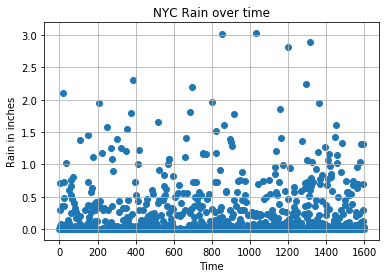

In [6]:
# Data for plotting
s = df_daily.DailyPrecipitation[:1599]
pd.DataFrame(s).to_csv("csvs/rain.csv")


t = np.arange(0, 1599, 1)

fig, ax = plt.subplots()
ax.scatter(t, s)

ax.set(xlabel='Time', ylabel='Rain in inches',
       title='NYC Rain over time')
ax.grid()

fig.savefig("images/rain.png")
plt.show()



In [7]:
print( s.std(), s.mean(), s.skew(), s.kurtosis(), s.max() )
print( df_daily[df_daily.DailyPrecipitation > 3.02])


0.34047392850339164 0.1332270168855536 3.962308583671728 19.841372830020795 3.03
                      DATE  Sunrise  Sunset  DailyAverageDryBulbTemperature  \
32188  2017-10-29 23:59:00    623.0  1656.0                              64   

       DailyPeakWindSpeed  DailyPrecipitation  DailySnowDepth  DailySnowfall  
32188                36.0                3.03             0.0            0.0  


0.5220661879255954 1.01202614379085 1.775302901894041 3.5402769998377424


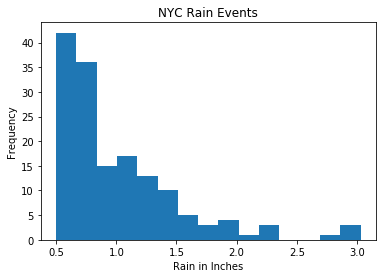

In [8]:
fig, ax = plt.subplots()
s = df_daily.DailyPrecipitation[:1599]
s = df_daily.DailyPrecipitation[(df_daily.DailyPrecipitation >= 0.5)]
ax.set(xlabel='Rain in Inches', 
       title='NYC Rain Events')
ax = s.plot.hist(bins=15)
fig.savefig("images/rain-hist.png")

print( s.std(), s.mean(), s.skew(), s.kurtosis() )

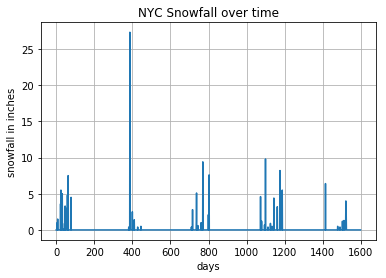

In [9]:
# Data for plotting
s = df_daily.DailySnowfall[:1599]


t = np.arange(0, 1599, 1)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='days', ylabel='snowfall in inches',
       title='NYC Snowfall over time')
ax.grid()

fig.savefig("images/snow.png")
plt.show()

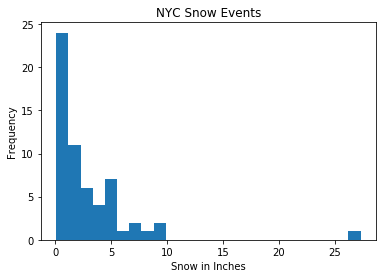

In [10]:
fig, ax = plt.subplots()
s = df_daily.DailySnowfall[(df_daily.DailySnowfall > 0)]
ax.set(xlabel='Snow in Inches', 
       title='NYC Snow Events')
ax = s.plot.hist(bins=25)
fig.savefig("images/snow-hist.png")

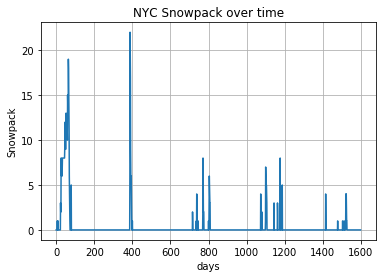

In [11]:
# Data for plotting
s = df_daily.DailySnowDepth[:1599]
t = np.arange(0, 1599, 1)


fig, ax = plt.subplots()
ax.plot(t, s)


ax.set(xlabel='days', ylabel='Snowpack',
       title='NYC Snowpack over time')
ax.grid()

fig.savefig("images/snowpack.png")
plt.show()

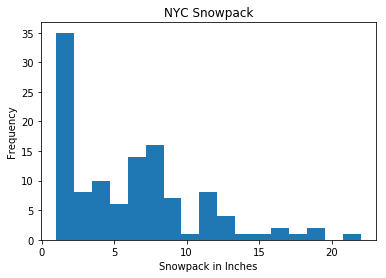

In [12]:
fig, ax = plt.subplots()
s = df_daily.DailySnowDepth[(df_daily.DailySnowDepth > 0)]
#s = df_daily.DailyPeakWindSpeed[(df_daily.DailyPeakWindSpeed < 120)])

ax.set(xlabel='Snowpack in Inches', 
       title='NYC Snowpack')

ax = s.plot.hist(bins=17)
fig.savefig("images/snowpack-hist.png")


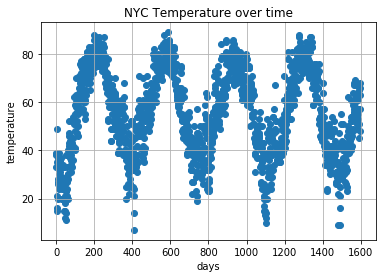

In [13]:
# Data for plotting
s = df_daily.DailyAverageDryBulbTemperature[:1599]

t = np.arange(0, 1599, 1)
fig, ax = plt.subplots()
ax.scatter(t, s)

ax.set(xlabel='days', ylabel='temperature',
       title='NYC Temperature over time')
ax.grid()

fig.savefig("images/temperature.png")
plt.show()

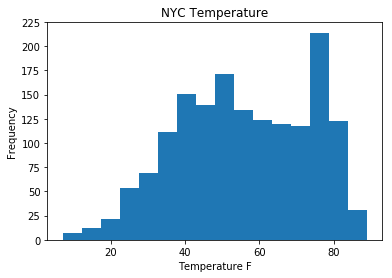

In [14]:
fig, ax = plt.subplots()
s = df_daily.DailyAverageDryBulbTemperature[:1599]
ax = s.plot.hist(bins=16)
ax.set(xlabel='Temperature F', 
       title='NYC Temperature')
fig.savefig("images/temp-hist.png")

In [15]:
df_daily['wind2'] = df_daily.DailyPeakWindSpeed.apply(lambda x: x if (x<100 and x > 1) else 0)
s = pd.DataFrame(df_daily.DailyPeakWindSpeed[(df_daily.DailyPeakWindSpeed < 120)])

#and (df_daily.DailyPeakWindSpeed > 1)]
s.shape

(1446, 1)

(1427,)


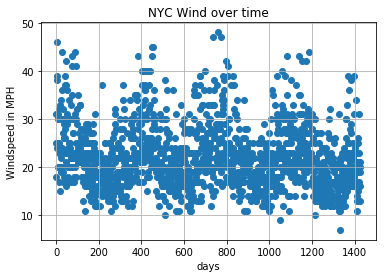

In [16]:
# Data for plotting
s = pd.DataFrame(df_daily.DailyPeakWindSpeed[df_daily.DailyPeakWindSpeed < 120 ])
s = s.DailyPeakWindSpeed[df_daily.DailyPeakWindSpeed > 1 ]

print(s.shape)
t = np.arange(0, 1427, 1)

fig, ax = plt.subplots()
ax.scatter(t, s)

ax.set(xlabel='days', ylabel='Windspeed in MPH',
       title='NYC Wind over time')
ax.grid()

fig.savefig("images/wind_broken.png")
plt.show()

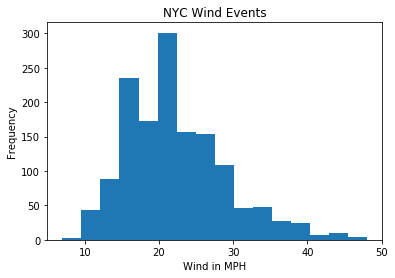

In [17]:
#s = df_daily.DailyPeakWindSpeed[:1599]
fig, ax = plt.subplots()
ax = s.plot.hist(bins=16)
ax.set(xlabel='Wind in MPH', 
       title='NYC Wind Events')
fig.savefig("images/wind-hist.png")


(1427,)
(1427,)


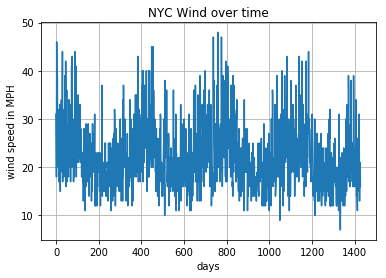

In [18]:
# Data for plotting
print(s.shape) 
s = df_daily.wind2[(df_daily.wind2 > 1)]
#s = df_daily.wind2[:1599]

print(s.shape)
t = np.arange(0, 1427, 1)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='days', ylabel='wind speed in MPH',
       title='NYC Wind over time')
ax.grid()

fig.savefig("images/wind_fixed.png")
plt.show()

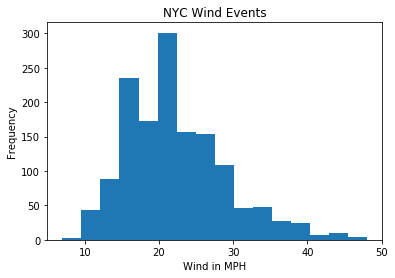

In [19]:
#s = df_daily.wind2[:1599]
fig, ax = plt.subplots()
ax = s.plot.hist(bins=16)
ax.set(xlabel='Wind in MPH', 
       title='NYC Wind Events')
fig.savefig("images/wind-fixed-hist.png")


# Let's add features

Add some features that identify the weather conditions in a way that we can use it in a classifier. 



In [20]:
df_daily['Condition']   = "Normal"
df_daily['Temperature'] = "Mild"

def transform_row(r):
    if (r.DailySnowDepth > 4): 
        r.Condition = "Snowpack"
    if ((r.DailyPeakWindSpeed > 35) & (r.DailyPeakWindSpeed < 200)):
        r.Condition = "Wind"
    if (r.DailySnowfall > 1.0) :
        r.Condition = "Snow"
    if (r.DailyPrecipitation > 0.5):
        r.Condition = "Rain"
    if (r.DailyAverageDryBulbTemperature > -100):
        r.Temperature = "Freezing"
    if (r.DailyAverageDryBulbTemperature > 32):
        r.Temperature = "Cold"
    if (r.DailyAverageDryBulbTemperature > 60):
        r.Temperature = "Warm"
    if (r.DailyAverageDryBulbTemperature > 80):
        r.Temperature = "Hot"
    return r

df_daily = df_daily.apply(transform_row, axis=1)


In [21]:
df_daily[df_daily['Condition'] == 'Normal'].count()
#df_daily[df_daily['DailySnowfall'] > 10]

DATE                              1333
Sunrise                           1333
Sunset                            1333
DailyAverageDryBulbTemperature    1333
DailyPeakWindSpeed                1333
DailyPrecipitation                1333
DailySnowDepth                    1333
DailySnowfall                     1333
wind2                             1333
Condition                         1333
Temperature                       1333
dtype: int64

In [22]:
pd.get_dummies(df_daily, columns=["Condition", "Temperature"]).to_csv("csvs/Weather_One_Shot.csv")

In [23]:
df_daily.shape

(1599, 11)